In [1]:
from casadi import *
import numpy as np
import matplotlib.pyplot as plt

In [57]:
N = 25
m = 40/N
D = 70*N
g = 9.81
L = 5/N

In [58]:
opti = Opti()

In [59]:
positions = opti.variable(N,2)

In [60]:
positions[0,:] = [-2, 0]

In [61]:
positions[-1,:] = [2, 0]

In [62]:
positions

MX(((opti2_x_1[:50:25] = [-2, 0]')[24:74:25] = [2, 0]'))

In [63]:
grav_e = m * g * sum1(positions[:,1])

In [64]:
pot_e = 0.5*D* sum2(sum1((positions[:-1,:]- positions[1:,:])**2))

In [65]:
pot_e

MX(@1=((opti2_x_1[:50:25] = [-2, 0]')[24:74:25] = [2, 0]'), (875*mac(mac(ones(1x24),sq((@1[:50:25;:24]-@1[:50:25;1:25])),zeros(1x2)),ones(2x1),0)))

In [66]:
tot_e = grav_e + pot_e

In [67]:
tot_e.shape

(1, 1)

In [68]:
opti.minimize(tot_e)

In [69]:
opti.subject_to(positions[0,:].T == [-2, 0])

In [70]:
opti.subject_to(positions[-1,:].T == [2, 0])

In [71]:
opti.solver('ipopt')

In [72]:
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       90

Total number of variables............................:       50
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        4
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [73]:
def_sol = sol.value(positions)

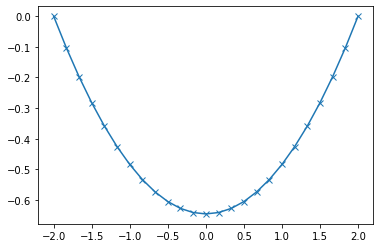

In [97]:
plt.plot(def_sol[:,0], def_sol[:,1], marker = 'x')

In [75]:
opti.f

MX(@1=((opti2_x_1[:50:25] = [-2, 0]')[24:74:25] = [2, 0]'), ((15.696*mac(ones(1x25),@1[25:50],0))+(875*mac(mac(ones(1x24),sq((@1[:50:25;:24]-@1[:50:25;1:25])),zeros(1x2)),ones(2x1),0))))

In [76]:
opti.x

MX(vec(opti2_x_1))

In [84]:
hess_pos = hessian(opti.f, opti.x)[0]

In [90]:
hess_pos.sparsity().spy()

..................................................
.**...............................................
.***..............................................
..***.............................................
...***............................................
....***...........................................
.....***..........................................
......***.........................................
.......***........................................
........***.......................................
.........***......................................
..........***.....................................
...........***....................................
............***...................................
.............***..................................
..............***.................................
...............***................................
................***...............................
.................***..............................
..................***..........

In [ ]:
import pylab as pl

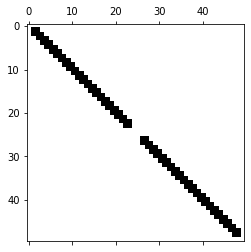

In [91]:
pl.spy(hess_pos.sparsity())

In [92]:
opti.lam_g

MX(vertcat(opti2_lam_g_1, opti2_lam_g_2))

In [93]:
opti.g

MX(@1=((opti2_x_1[:50:25] = [-2, 0]')[24:74:25] = [2, 0]'), vertcat(@1[:50:25]', @1[24:74:25]'))

Lagrangiana:

In [98]:
lag = opti.f+opti.lam_g.T @ opti.g
 
grad_lag = sol.value(gradient(lag,opti.x))
 
print(pl.norm(grad_lag))

4.571413648684164e-07


In [102]:
distances = sqrt(sum2((positions[:-1,:]- positions[1:,:])**2))

In [103]:
distances.shape

(24, 1)

In [104]:
pot_e = 0.5*D* sum1((L - distances)**2)

In [105]:
tot_e = grav_e + pot_e

In [106]:
opti.minimize(tot_e)

In [111]:
init_pos = np.zeros([N, 2])

In [112]:
init_pos[:, 0] = np.linspace(-2,2,N)

In [113]:
opti.set_initial(positions, init_pos)

In [114]:
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      157

Total number of variables............................:       50
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        4
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [115]:
def_sol = sol.value(positions)

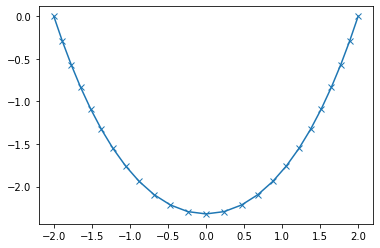

In [116]:
plt.plot(def_sol[:,0], def_sol[:,1], marker = 'x')

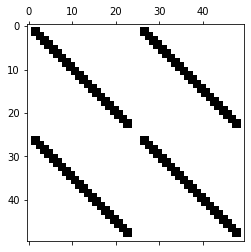

In [117]:
hess_pos = hessian(opti.f, opti.x)[0]
pl.spy(hess_pos.sparsity())

In [128]:
def plot_iteration(i, pos):
    plt.plot(pos[:,0], pos[:,1], marker = 'x', label = 'iteration'+str(i), color=colors[i])

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      157

Total number of variables............................:       50
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        4
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

OptiSol(Opti {
  instance #2
  #variables: 1 (nx = 50)
  #parameters: 0 (np = 0)
  #constraints: 2 (ng = 4)
  CasADi solver allocated.
  CasADi solver was called: Solve_Succeeded
})

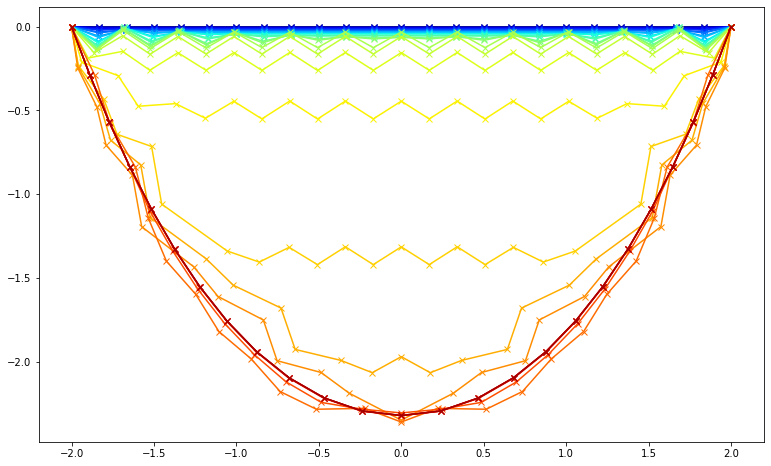

In [129]:
plt.figure(figsize=[13,8])
colors = pl.cm.jet(np.linspace(0,1,30))
opti.callback(lambda i: plot_iteration(i, opti.debug.value(positions)))
opti.solve()
#plt.legend()

## Ejercicio 2: Fitting

In [130]:
a = MX.sym('a')
b = MX.sym('b')
alpha = MX.sym('alpha')
beta  = MX.sym('beta')
gamma = MX.sym('gamma')
delta  = MX.sym('delta')

In [131]:
p = vertcat(a,b,alpha,beta,gamma,delta)

In [143]:
p_est = vertcat(1.43, 0.99, 0.22, 0.022, 0.022, 0.011)

In [144]:
x = MX.sym('x')
y = MX.sym('y')

In [135]:
x_next = (a * x - alpha*x*y)/(1 + gamma*x)
y_next = (b * y + beta*x*y)/(1 + delta*y)

In [136]:
pop_step = Function('pop_step', [x,y,p], [x_next, y_next])

In [137]:
x_0 = 10
y_0 = 0.1

In [145]:
x_curr = x_0
y_curr = y_0
for i in range(10):
    x_curr, y_curr = pop_step(x_curr, y_curr, p_est)
    print(x_curr, y_curr)

11.541 0.120867
12.9171 0.150147
14.0516 0.190998
14.8979 0.247612
15.4339 0.325406
15.6513 0.431099
15.5445 0.572512
15.1051 0.757802
14.3225 0.993767
13.1929 1.28294


In [146]:
data_mat = np.loadtxt('data.mat')

In [148]:
data_mat.shape

(101, 2)

In [164]:
def sq_err(x0, y0, data, p, n):
    error = 0
    x_curr = x_0
    y_curr = y_0
    for i in range(n):
        x_curr, y_curr = pop_step(x_curr, y_curr, p)
        x_obj, y_obj = data[i+1, :]
        err_x = (x_curr - x_obj)**2
        err_y = (y_curr - y_obj)**2
        error += err_x + err_y
    return error

In [165]:
sq_err(10, 0.1, data_mat, p_est, 10)

DM(56.8927)

In [151]:
opti = Opti()

In [152]:
p = opti.variable(6)

In [153]:
opti.set_initial(p, p_est)

In [166]:
tot_error = sq_err(10, 0.1, data_mat, p, 100)

In [167]:
tot_error

MX(@1=pop_step(10, 0.1, opti3_x_1), @2=@1{0}, @3=@1{1}, @4=pop_step(@2, @3, opti3_x_1), @5=@4{0}, @6=@4{1}, @7=pop_step(@5, @6, opti3_x_1), @8=@7{0}, @9=@7{1}, @10=pop_step(@8, @9, opti3_x_1), @11=@10{0}, @12=@10{1}, @13=pop_step(@11, @12, opti3_x_1), @14=@13{0}, @15=@13{1}, @16=pop_step(@14, @15, opti3_x_1), @17=@16{0}, @18=@16{1}, @19=pop_step(@17, @18, opti3_x_1), @20=@19{0}, @21=@19{1}, @22=pop_step(@20, @21, opti3_x_1), @23=@22{0}, @24=@22{1}, @25=pop_step(@23, @24, opti3_x_1), @26=@25{0}, @27=@25{1}, @28=pop_step(@26, @27, opti3_x_1), @29=@28{0}, @30=@28{1}, @31=pop_step(@29, @30, opti3_x_1), @32=@31{0}, @33=@31{1}, @34=pop_step(@32, @33, opti3_x_1), @35=@34{0}, @36=@34{1}, @37=pop_step(@35, @36, opti3_x_1), @38=@37{0}, @39=@37{1}, @40=pop_step(@38, @39, opti3_x_1), @41=@40{0}, @42=@40{1}, @43=pop_step(@41, @42, opti3_x_1), @44=@43{0}, @45=@43{1}, @46=pop_step(@44, @45, opti3_x_1), @47=@46{0}, @48=@46{1}, @49=pop_step(@47, @48, opti3_x_1), @50=@49{0}, @51=@49{1}, @52=pop_step(@50

In [168]:
opti.minimize(tot_error)

In [169]:
opti.solver('ipopt')

In [170]:
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       21

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [171]:
sol

OptiSol(Opti {
  instance #3
  #variables: 1 (nx = 6)
  #parameters: 0 (np = 0)
  #constraints: 0 (ng = 0)
  CasADi solver allocated.
  CasADi solver was called: Solve_Succeeded
})

In [173]:
sol.value(p)

array([1.3 , 0.9 , 0.2 , 0.02, 0.02, 0.01])

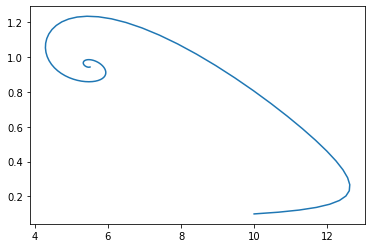

In [174]:
plt.plot(data_mat[:,0], data_mat[:,1])

In [183]:
x_curr = x_0
y_curr = y_0
F = []
for i in range(100):
    x_curr, y_curr = pop_step(x_curr, y_curr, p)
    x_obj, y_obj = data_mat[i+1, :]
    err_x = (x_curr - x_obj)**2
    err_y = (y_curr - y_obj)**2
    F = F+ [err_x, err_y,]

In [186]:
F = vcat(F)

In [187]:
opti.minimize(F.T@F)

In [190]:
opti.set_initial(p, p_est)

In [191]:
sol = opti.solve()
print(sol.value(p))

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       21

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

CasADi - 2019-11-19 12:18:59 WARNING("solver:nlp_f failed: Inf detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]


  24  6.2800946e-09 0.00e+00 2.66e-08  -8.6 8.24e-04    -  1.00e+00 1.00e+00f  1
  25  1.2692028e-09 0.00e+00 8.04e-09  -8.6 5.56e-04    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 25

                                   (scaled)                 (unscaled)
Objective...............:   1.7057356894245353e-14    1.2692027726891919e-09
Dual infeasibility......:   8.0359320893995942e-09    5.9793714537619447e-04
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.0359320893995942e-09    5.9793714537619447e-04


Number of objective function evaluations             = 37
Number of objective gradient evaluations             = 26
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 0
Number of inequality constraint Jacobian evaluations = 0
Numbe

In [192]:
sol.value(p)

array([1.30112773, 0.89961358, 0.20088403, 0.02000313, 0.02008213,
       0.00961177])

In [196]:
opti = Opti()
 
a = opti.variable()
b = opti.variable()
alpha = opti.variable()
beta = opti.variable()
 
gamma = opti.variable()
delta = opti.variable()
 
p = vertcat(a,b,alpha,beta,gamma,delta)
 
x = 10
y = 0.1
 
F = []
 
for i in range(N):
    F.append(vertcat(x-data_mat[i,0],y-data_mat[i,1]))
    x_next = (a*x-alpha*x*y)/(1+gamma*x)
    y_next = (b*y+beta*x*y)/(1+delta*y)
 
    x = x_next
    y = y_next
 
F.append(vertcat(x-data_mat[100,0],y-data_mat[100,1]))
 
F = vcat(F)
 
opti.minimize(F.T @ F)
 
J = jacobian(F,p)
 
H = 2*J.T @ J # Factor two to be consistent with missing 0.5 in objective.
 
sigma = MX.sym('sigma')
opts = dict()
opts["hess_lag"] = Function('hess_lag',[opti.x,opti.p,sigma,opti.lam_g], [sigma*triu(H)])
opti.solver('ipopt',opts)
 
opti.set_initial(p,p_est)
 
sol = opti.solve()
 
print(sol.value(p)) #   [1.3; 0.9; 0.2; 0.02; 0.02; 0.01]

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       21

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

## Optimal Control

In [38]:
opti = Opti()

In [39]:
N = 4

In [40]:
X = opti.variable(N+1)
U = opti.variable(N)

In [41]:
F = lambda x, u : x**2+u

In [42]:
objective = sum1(X**2) + sum1(U**2)

In [43]:
opti.minimize(objective)

In [44]:
opti.solver('ipopt')

In [45]:
opti.subject_to(X[0] == 2)
opti.subject_to(X[-1] == 3)
opti.subject_to(X >= 0)

In [46]:
for i in range(N):
    opti.subject_to(X[i+1] == F(X[i], U[i]))

In [47]:
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       14
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        9

Total number of variables............................:        9
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        6
Total number of inequality constraints...............:        5
        inequality constraints with only lower bounds:        5
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [48]:
sol.value(U)

array([-2.70380638, -0.54297936,  0.26125189,  0.58403971])

In [49]:
Usol_MS = sol.value(U)
opti_MS = opti
U_MS = U
sol_MS = sol

Single Shooting

In [50]:
N = 4
opti = Opti()
U = opti.variable(N)
F = lambda x, u : x**2+u

In [51]:
opti.solver('ipopt')

In [52]:
X = [2]
for k in range(N):
    X.append(F(X[-1],U[k]))

X = hcat(X)

In [53]:
opti.subject_to(X[-1] == 3)
opti.subject_to(X[:] >= 0)

In [54]:
objective = sum2(X**2) + sum1(U**2)

In [55]:
opti.minimize(objective)

In [56]:
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        4
Number of nonzeros in inequality constraint Jacobian.:       10
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        5
        inequality constraints with only lower bounds:        5
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [57]:
sol.value(U)

array([-2.70380008, -0.54298561,  0.26123341,  0.58403084])

In [58]:
Usol_SS = sol.value(U) 
opti_SS = opti
U_SS = U
sol_SS = sol

MS Hessian
MS jacobian


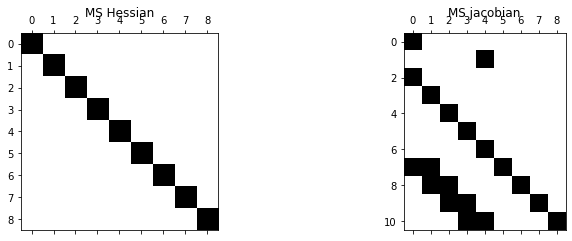

In [59]:
plt.figure(figsize=[12,8])
print('MS Hessian')
plt.subplot('221')
plt.title('MS Hessian')
plt.spy(hessian(opti_MS.f,opti_MS.x)[0].sparsity())
# Only diagonal elements: no coupling between x or u,
# on coupling between control intervals
 
print('MS jacobian')
plt.subplot('222')
plt.title('MS jacobian')
plt.spy(jacobian(opti_MS.g,opti_MS.x).sparsity())
 
# Dynamic constraints: coupling between x_k+1 and x_k and u_k -> banded
# Path constraints: only dependent on x-> diagonal


SS Hessian
SS jacobian


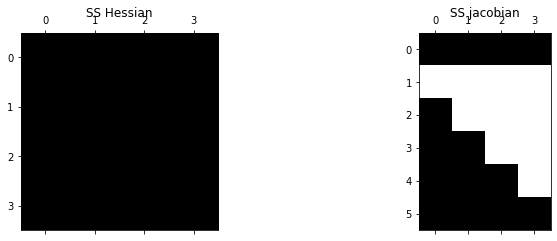

In [68]:
plt.figure(figsize=[12,8])
print('SS Hessian')
plt.subplot('223')
plt.title('SS Hessian')
#plt.spy(hessian(opti_SS.f,opti_SS.x)[0].sparsity())
plt.spy(hessian(objective,U)[0].sparsity(),cmap = 'gray')
#plt.colorbar()
 
# Smaller than MS Hessian
# Objective depends in a very nonlinear way on all u -> dense
 
print('SS jacobian')
plt.subplot('224')
plt.title('SS jacobian')
plt.spy(jacobian(opti_SS.g,opti_SS.x).sparsity())
 
 
# x_k depends on all u_j with j<k -> triangular

## Ejercicio 8 - Péndulo

In [2]:
 
# Physical constants
g = 9.81    # gravitation [m/s^2]
L = 0.2     # pendulum length [m]
m = 1       # pendulum mass [kg]
mcart = 0.5 # cart mass [kg]
 
T = 2.0 # control horizon [s]
N = 160 # Number of control intervals
 
dt = T/N # length of 1 control interval [s]
 
# System is composed of 4 states
nx = 4


continuous system dot(x)=f(x,u)

In [3]:
# Construct a CasADi function for the ODE right-hand side
x = MX.sym('x',nx) # states: pos [m], theta [rad], dpos [m/s], dtheta [rad/s]
u = MX.sym('u') # control force [N]
ddpos = ((u+m*L*x[3]*x[3]*sin(x[1])-m*g*sin(x[1])*cos(x[1]))/(mcart+m-m*cos(x[1])*cos(x[1])))
rhs = vertcat(x[2],x[3],ddpos,g/L*sin(x[1])-cos(x[1])*ddpos)
 
# Continuous system dynamics as a CasADi Function
f = Function('f', [x, u],[rhs])

Discrete system x_next = F(x,u)

In [4]:
# Integrator options
intg_options = dict();
intg_options["number_of_finite_elements"] = 1;
intg_options["tf"] = dt/intg_options["number_of_finite_elements"]
 
# Reference Runge-Kutta implementation
intg = integrator('intg','rk',{'x':x,'p':u,'ode':f(x,u)},intg_options)
res = intg(x0=x,p=u)
 
# Discretized (sampling time dt) system dynamics as a CasADi Function
F = Function('F', [x, u], [res["xf"]])

Optimal control problem, multiple shooting

In [5]:
opti = casadi.Opti()
 
# Decision variables for states
X = opti.variable(nx,N+1)
# Aliases for states
pos    = X[0,:]
theta  = X[1,:]
dpos   = X[2,:]
dtheta = X[3,:]
 
# Decision variables for control vector
U =  opti.variable(N,1) # force [N]
 
# Gap-closing shooting constraints
for k in range(N):
    opti.subject_to(X[:,k+1]==F(X[:,k],U[k]))
 
 
# Path constraints
opti.subject_to(opti.bounded(-3,  pos, 3)) # Syntax -3 <= pos <= 3 not supported in Python
opti.subject_to(opti.bounded(-1.2, U, 1.2))
 
# Initial and terminal constraints
opti.subject_to(X[:,0]==vertcat(1,0,0,0))
opti.subject_to(X[:,-1]==vertcat(0,0,0,0))
 
# Objective: regularization of controls
opti.minimize(sumsqr(U))
 
# solve optimization problem
opti.solver('ipopt')
 
sol = opti.solve()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3048
Number of nonzeros in inequality constraint Jacobian.:      321
Number of nonzeros in Lagrangian Hessian.............:      960

Total number of variables............................:      804
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

Post-processing: plotting

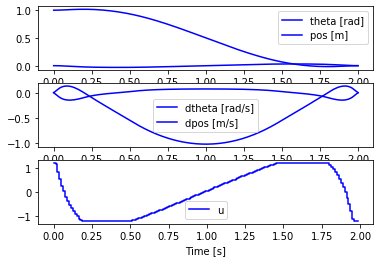

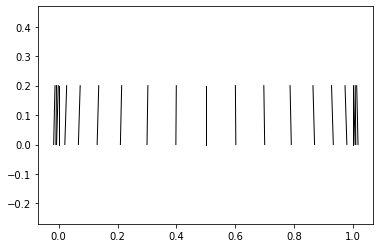

In [9]:
pos_opt = sol.value(pos)
theta_opt = sol.value(theta)
dpos_opt = sol.value(dpos)
dtheta_opt = sol.value(dtheta)
 
u_opt = sol.value(U)
 
# time grid for printing
tgrid = np.linspace(0,T, N+1)
 
plt.figure()
plt.subplot(3,1,1)
plt.plot(tgrid, theta_opt, 'b')
plt.plot(tgrid, pos_opt, 'b')
plt.legend(('theta [rad]','pos [m]'))
plt.xlabel('Time [s]')
plt.subplot(3,1,2)
plt.plot(tgrid, dtheta_opt, 'b')
plt.plot(tgrid, dpos_opt, 'b')
plt.legend(('dtheta [rad/s]','dpos [m/s]'))
plt.xlabel('Time [s]')
plt.subplot(3,1,3)
plt.step(tgrid[:-1], u_opt, 'b')
plt.legend('u [m/s^2]')
plt.xlabel('Time [s]')
 
cart = vertcat(pos,0*pos)
ee   = vertcat(pos+L*sin(theta),L*cos(theta))
 
cart_sol = sol.value(cart)
ee_sol   = sol.value(ee)
 
plt.figure()
for k in range(0,N+1,8):
    plt.plot([cart_sol[0,k],ee_sol[0,k]],[cart_sol[1,k],ee_sol[1,k]],'k',linewidth=1)

plt.axis('equal')
plt.show()